Reference: http://blog.castman.net/%E6%95%99%E5%AD%B8/2018/01/27/python-name-main.html

## 15. Simple Moving Average (SMA)

In [18]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [19]:
aapl = yf.download('AAPL', '2021-01-05', '2023-01-02')
aapl

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-05 00:00:00-05:00,128.889999,131.740005,128.429993,131.009995,129.455933,97664900
2021-01-06 00:00:00-05:00,127.720001,131.050003,126.379997,126.599998,125.098289,155088000
2021-01-07 00:00:00-05:00,128.360001,131.630005,127.860001,130.919998,129.367050,109578200
2021-01-08 00:00:00-05:00,132.429993,132.630005,130.229996,132.050003,130.483643,105158200
2021-01-11 00:00:00-05:00,129.190002,130.169998,128.500000,128.979996,127.450020,100384500
...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,130.919998,132.419998,129.639999,131.860001,131.860001,63814900
2022-12-27 00:00:00-05:00,131.380005,131.410004,128.720001,130.029999,130.029999,69007800
2022-12-28 00:00:00-05:00,129.669998,131.029999,125.870003,126.040001,126.040001,85438400


[*********************100%***********************]  1 of 1 completed
                               Price  Short SMA   Long SMA
Date                                                      
2001-10-22 00:00:00-04:00  58.605927  54.032901  58.620393
2001-10-23 00:00:00-04:00  58.917728  54.134242  58.679717
2001-10-24 00:00:00-04:00  60.454597  54.330431  58.719506
2001-10-25 00:00:00-04:00  61.618355  54.591583  58.769101
2001-10-26 00:00:00-04:00  61.896778  54.864242  58.817834
...                              ...        ...        ...
2010-12-23 00:00:00-05:00  91.279564  90.380268  82.404099
2010-12-27 00:00:00-05:00  90.935455  90.378391  82.464290
2010-12-28 00:00:00-05:00  91.166939  90.419476  82.525978
2010-12-29 00:00:00-05:00  91.673775  90.479542  82.587610
2010-12-30 00:00:00-05:00  91.767586  90.571932  82.652517

[2315 rows x 3 columns]


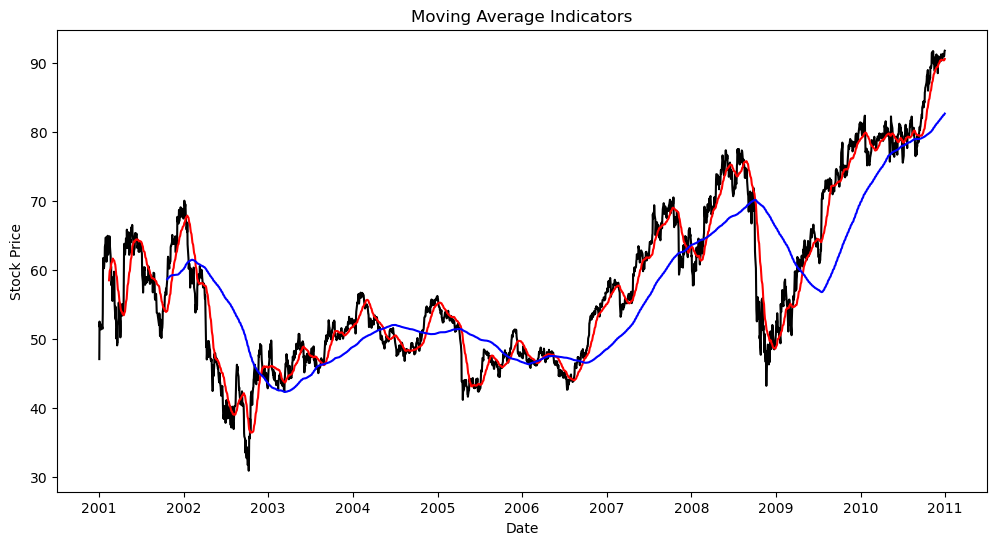

In [20]:
def download_data(stock, start_date, end_date): 
    data = {}
    ticker = yf.download(stock, start_date, end_date)
    data['Price'] = ticker['Adj Close']
    return pd.DataFrame(data)

def construct_signals(data, short_period, long_period): 
    data['Short SMA'] = data['Price'].rolling(window=short_period).mean()
    data['Long SMA'] = data['Price'].rolling(window=long_period).mean()
    #data['Short SMA'] = data['Price'].ewm(span=short_period, adjust=False).mean()
    #data['Long SMA'] = data['Price'].ewm(span=long_period, adjust=False).mean()
    data = data.dropna()
    print(data)

def plot_data(data): 
    plt.figure(figsize=(12,6))
    plt.plot(data['Price'], label='Stock Price', color='black')
    plt.plot(data['Short SMA'], label='Short MA', color='red')
    plt.plot(data['Long SMA'], label='Long MA', color='blue')
    plt.title('Moving Average Indicators')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.show()
    
    
if __name__ == '__main__':  #使用這一段表示，download_data()這個函數可能會在其他.py檔裡面被取用，但是我不希望完全跑過
    #S5--Moving Average Strategy.py這個檔案，而是指跑過download_data()的程式碼。
    #from S5--Moving Average Strategy import download_data
    
    start = '2000-12-31'
    end = '2010-12-31'
    stock_data = download_data('IBM', start, end)
    construct_signals(stock_data, 30, 200)
    plot_data(stock_data)
    

## 17. Exponential Moving Average (EMA)

**Exponential weighted: weighting(impact) on stock prices are decrease exponentially, with the recent ones are more important

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html

[*********************100%***********************]  1 of 1 completed
                               Price  Short SMA   Long SMA
Date                                                      
2001-01-02 00:00:00-05:00  47.052963  47.052963  47.052963
2001-01-03 00:00:00-05:00  52.496838  47.404181  47.107131
2001-01-04 00:00:00-05:00  51.699322  47.681287  47.152825
2001-01-05 00:00:00-05:00  52.150082  47.969596  47.202549
2001-01-08 00:00:00-05:00  51.907375  48.223646  47.249363
...                              ...        ...        ...
2010-12-23 00:00:00-05:00  91.279572  90.220479  83.290476
2010-12-27 00:00:00-05:00  90.935463  90.266607  83.366546
2010-12-28 00:00:00-05:00  91.166969  90.324695  83.444162
2010-12-29 00:00:00-05:00  91.673729  90.411729  83.526048
2010-12-30 00:00:00-05:00  91.767593  90.499204  83.608054

[2514 rows x 3 columns]


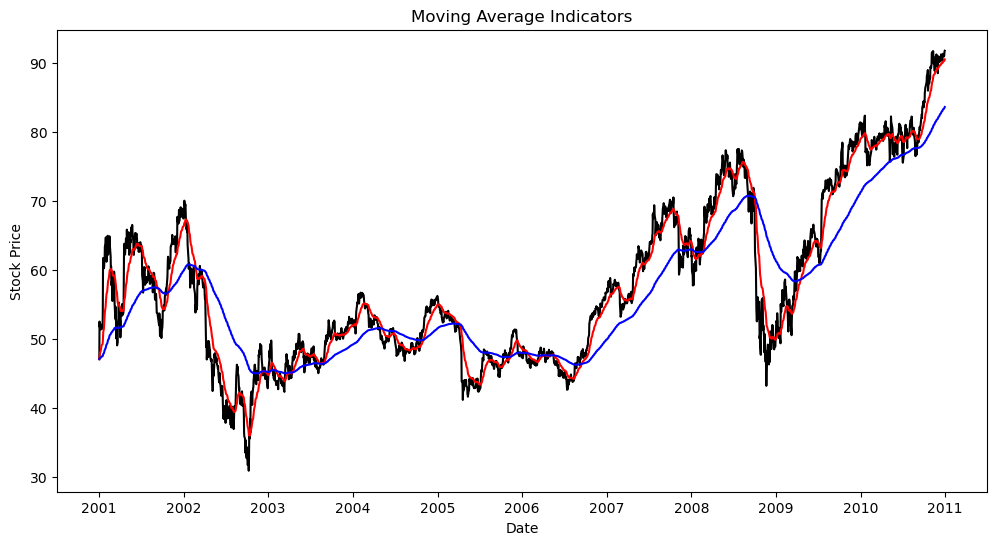

In [21]:
def download_data(stock, start_date, end_date): 
    data = {}
    ticker = yf.download(stock, start_date, end_date)
    data['Price'] = ticker['Adj Close']
    return pd.DataFrame(data)

def construct_signals(data, short_period, long_period): 
    data['Short SMA'] = data['Price'].ewm(span=short_period, adjust=False).mean()
    data['Long SMA'] = data['Price'].ewm(span=long_period, adjust=False).mean()
    data = data.dropna()
    print(data)

def plot_data(data): 
    plt.figure(figsize=(12,6))
    plt.plot(data['Price'], label='Stock Price', color='black')
    plt.plot(data['Short SMA'], label='Short MA', color='red')
    plt.plot(data['Long SMA'], label='Long MA', color='blue')
    plt.title('Moving Average Indicators')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.show()
    
    
if __name__ == '__main__':  #使用這一段表示，download_data()這個函數可能會在其他.py檔裡面被取用，但是我不希望完全跑過
    #S5--Moving Average Strategy.py這個檔案，而是指跑過download_data()的程式碼。
    #from S5--Moving Average Strategy import download_data
    
    start = '2000-12-31'
    end = '2010-12-31'
    stock_data = download_data('IBM', start, end)
    construct_signals(stock_data, 30, 200)
    plot_data(stock_data)
    

## 18. "Moving Average Crossover" Trading Strategy

**Using SMA to determine "Golden Cross"

In [47]:
# 創造物品
class MovingAverageCrossover: 
    
    # 定義物品的「特性」
    def __init__(self, capital, stock, start, end, short_period, long_period): 
        self.data = None
        self.is_long = False 
        self.short_period = short_period
        self.long_period = long_period
        self.capital = capital
        self.equity = [capital]
        self.stock = stock
        self.start = start 
        self.end = end
    
    # 定義物品的「功能」，其中又衍生出一個特性(self.data)
    def download_data(self): 
        stock_data = {}
        ticker = yf.download(self.stock, self.start, self.end)
        stock_data['Price'] = ticker['Adj Close']
        self.data = pd.DataFrame(stock_data)

    # 定義物品的「功能」
    def construct_signals(self): 
        self.data['Short MA'] = self.data['Price'].ewm(span=self.short_period, adjust=False).mean()
        self.data['Long MA'] = self.data['Price'].ewm(span=self.long_period, adjust=False).mean()
    
    def plot_data(self): 
        plt.figure(figsize=(12,6))
        plt.plot(self.data['Price'], label='Stock Price', color='black')
        plt.plot(self.data['Short MA'], label='Short MA', color='red')
        plt.plot(self.data['Long MA'], label='Long MA', color='blue')
        plt.title('Moving Average Crossover Trading Strategy')
        plt.xlabel('Date')
        plt.ylabel('Stock Price')
        plt.show()    
    
    # 定義物品的「功能」-- 設計交易策略
    def simulate(self): 
        price_when_buy = 0
        
        for index, row in self.data.iterrows(): 
            # open the long position 
            if row['Short MA'] > row['Long MA'] and not self.is_long: 
                price_when_buy = row['Price']
                self.is_long = True
                print('BUY')
            elif row['Short MA'] < row['Long MA'] and self.is_long: 
                self.equity.append(self.capital*row.Price/price_when_buy)
                self.is_long = False 
                print('SELL')

    # 定義物品的「功能」-- 計算本次交易策略可以達到多少收益
    def plot_equity(self): 
        print("Profit of the trading strategy: %.2f%%" %(
        (float(self.equity[-1]) - float(self.equity[0]))/
        float(self.equity[0])*100))
        print("Autual capital: $%0.2f" % self.equity[-1])
        
        plt.figure(figsize=(12,6))
        plt.title('Equity Curve')
        plt.plot(self.equity, label='Stock Price', color='green')
        plt.xlabel('Date')
        plt.ylabel('Actual Capital ($)')
        plt.show()

[*********************100%***********************]  1 of 1 completed
                                Price
Date                                 
2010-01-04 00:00:00-05:00    6.515212
2010-01-05 00:00:00-05:00    6.526477
2010-01-06 00:00:00-05:00    6.422664
2010-01-07 00:00:00-05:00    6.410789
2010-01-08 00:00:00-05:00    6.453412
...                               ...
2023-01-25 00:00:00-05:00  141.860001
2023-01-26 00:00:00-05:00  143.960007
2023-01-27 00:00:00-05:00  145.929993
2023-01-30 00:00:00-05:00  143.000000
2023-01-31 00:00:00-05:00  144.289993

[3292 rows x 1 columns]


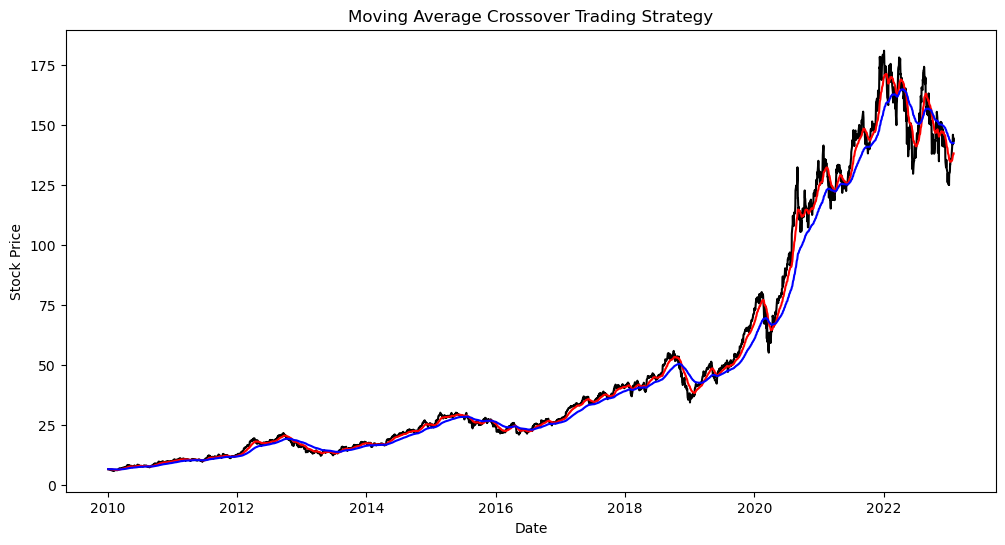

BUY
SELL
BUY
SELL
BUY
SELL
BUY
SELL
BUY
SELL
BUY
SELL
BUY
SELL
BUY
SELL
BUY
SELL
BUY
SELL
BUY
SELL
Profit of the trading strategy: -9.38%
Autual capital: $90.62


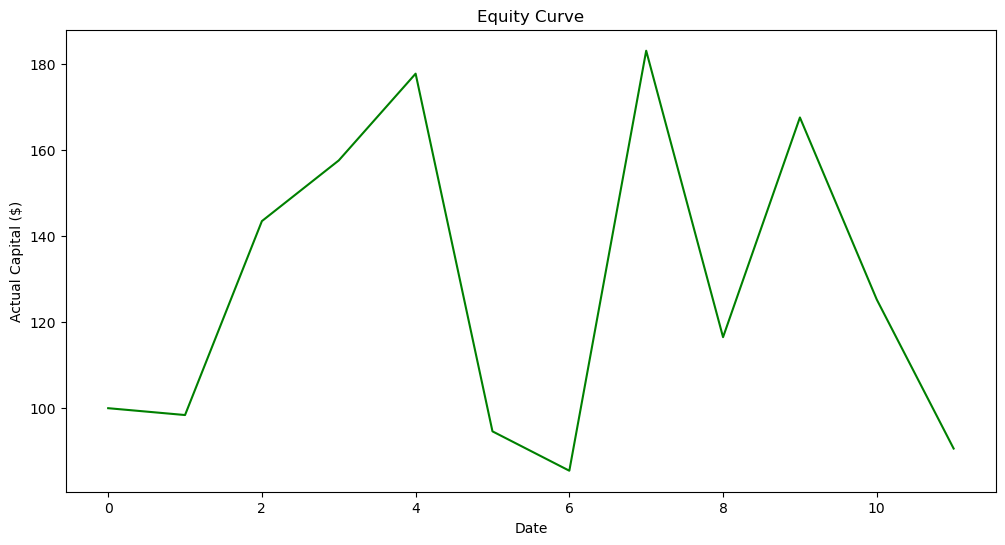

In [52]:
if __name__ == '__main__': 
    
    start_date = datetime.datetime(2010,1,1)
    end_date = datetime.datetime(2023,2,1)
    
    # 定義物品
    strategy = MovingAverageCrossover(100, 'AAPL', start_date, end_date, 30, 100)
    # 將物品的function拿出來用
    strategy.download_data()
    print(strategy.data)
    strategy.construct_signals()
    strategy.plot_data()
    strategy.simulate()
    strategy.plot_equity()